In [1]:
import requests
import json
import base64
from matplotlib import pyplot as plt
from matplotlib import patches
import cv2
import sys
import os

In [2]:
sys.path.append(os.path.abspath("../src"))

In [3]:
from utils import align_to_template

In [7]:
image = cv2.imread("/Users/volpea/Documents/projects/document-generator-job/data/test/example_form_real_4.jpg")
template = cv2.imread("/Users/volpea/Documents/projects/document-generator-text-extractor/data/templates/example_form_template.webp")

In [8]:
registered_image = align_to_template(image, template)

In [9]:
_, buffer = cv2.imencode(".png", registered_image)
encoded_image = base64.b64encode(buffer).decode("utf8")

In [10]:
model_api_url = "http://localhost:5001/predict"

In [11]:
response = requests.post(model_api_url, 
                         headers={"Content-Type": "application/json"}, 
                         data=json.dumps({
                             "image": encoded_image
                             }))

In [12]:
response.status_code

200

In [13]:
predictions = response.json()["predictions"]

In [14]:
predictions

[{'class': 9,
  'original_box': [665, 542, 854, 581],
  'predicted_text': 'MYEMAIL',
  'score': 0.9949033260345459,
  'text_score': 0.9765363335609436},
 {'class': 10,
  'original_box': [208, 545, 514, 584],
  'predicted_text': 'EXAMPLE STREET',
  'score': 0.9937219023704529,
  'text_score': 0.9757241010665894},
 {'class': 4,
  'original_box': [881, 695, 1001, 739],
  'predicted_text': '1000',
  'score': 0.9925171136856079,
  'text_score': 0.9594082832336426},
 {'class': 5,
  'original_box': [175, 428, 275, 469],
  'predicted_text': '123',
  'score': 0.9907350540161133,
  'text_score': 0.9981594085693359},
 {'class': 2,
  'original_box': [655, 433, 942, 474],
  'predicted_text': '02/05/2025',
  'score': 0.9895011782646179,
  'text_score': 0.9804749488830566},
 {'class': 7,
  'original_box': [662, 488, 907, 532],
  'predicted_text': '33344556',
  'score': 0.9789438247680664,
  'text_score': 0.9944167137145996},
 {'class': 8,
  'original_box': [703, 699, 787, 737],
  'predicted_text': '1

In [15]:
predictions[0]

{'class': 9,
 'original_box': [665, 542, 854, 581],
 'predicted_text': 'MYEMAIL',
 'score': 0.9949033260345459,
 'text_score': 0.9765363335609436}

In [16]:
classes = {'Item 1': 1,
 'Date': 2,
 'Quantity 1': 3,
 'Total 1': 4,
 'Number': 5,
 'Customer': 6,
 'Phone': 7,
 'Price 1': 8,
 'Email': 9,
 'Address': 10}

In [17]:
id_to_class = {v: k for k, v in classes.items()}

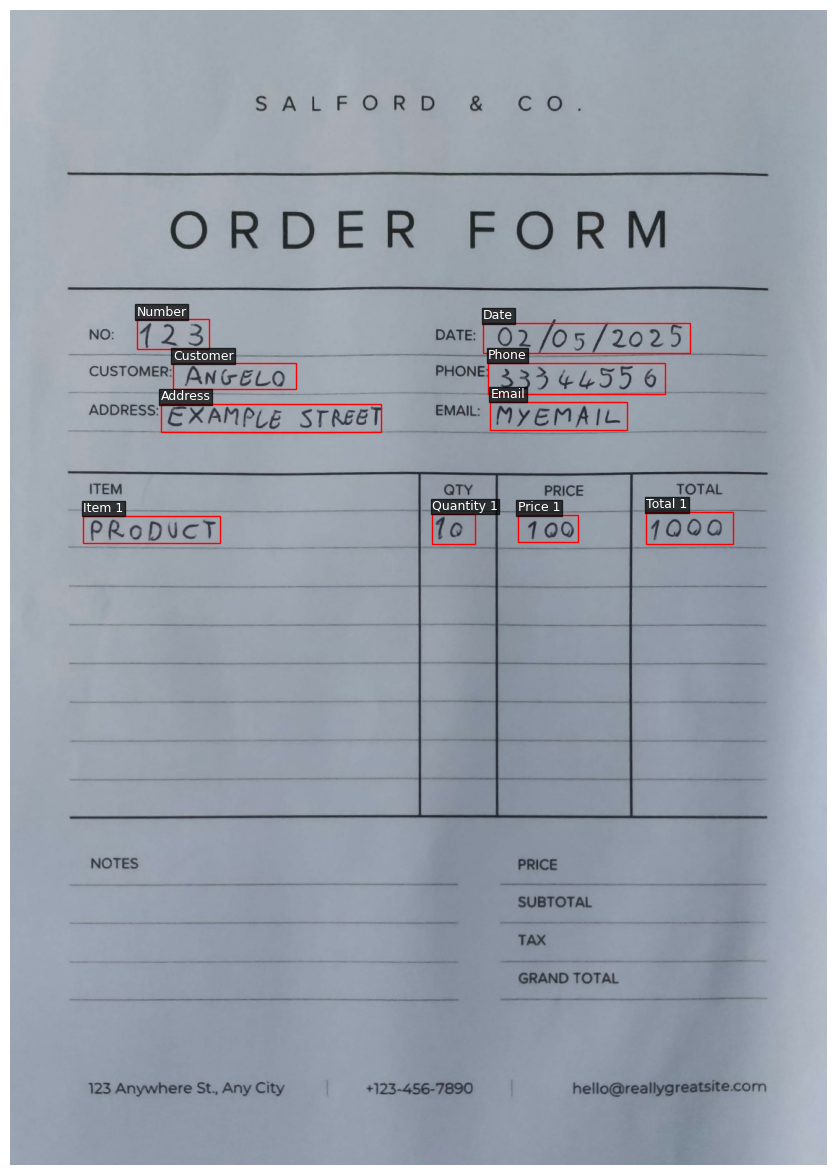

In [18]:
plt.figure(figsize=(15, 15))
plt.imshow(registered_image)
ax = plt.gca()

for pred in predictions:
    x1, y1, x2, y2 = pred["original_box"]
    w, h = x2 - x1, y2 - y1
    predicted_class = pred["class"]
    class_name = id_to_class[predicted_class]
    ax.add_patch(patches.Rectangle((x1, y1), w, h,
                               fill=False, edgecolor="red", linewidth=1))
    
    plt.text(x1, y1-5, class_name, fontsize=9, color='white', 
             bbox={'facecolor': "black", 'alpha': 0.7, 'pad': 1})
    
plt.axis("off")
plt.show()

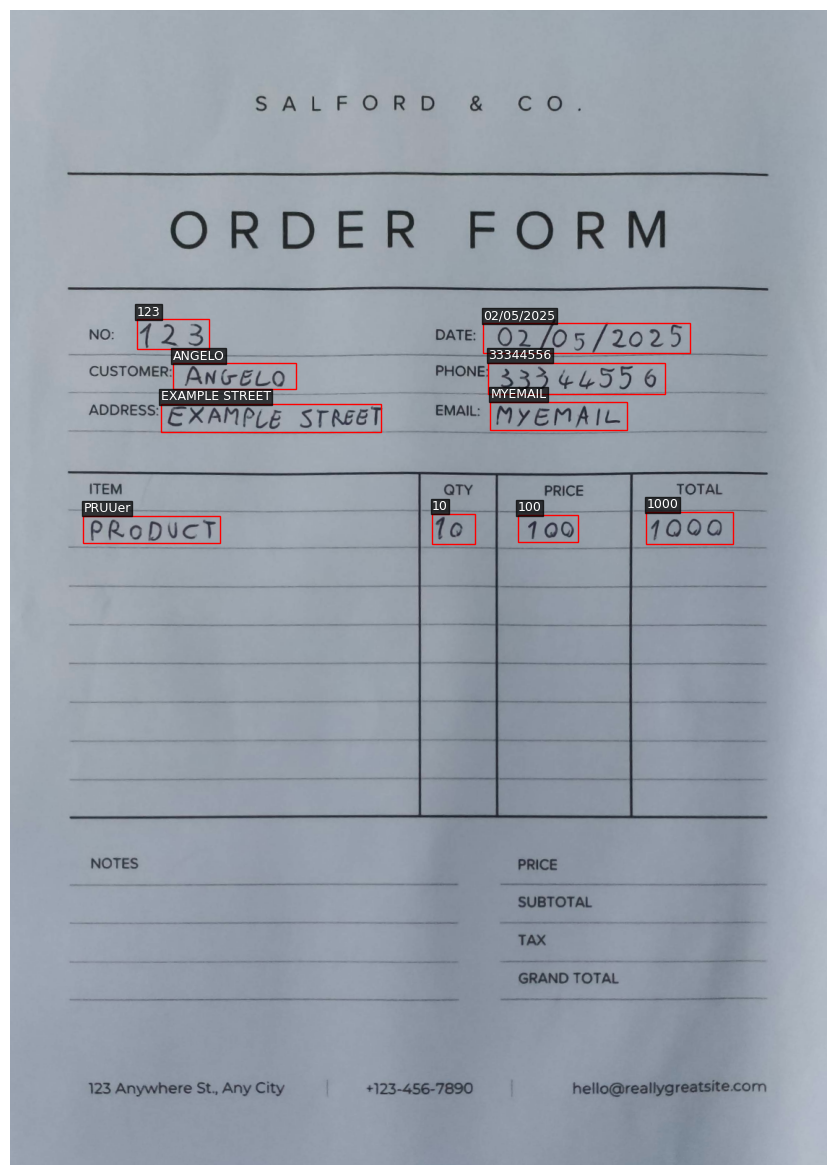

In [19]:
plt.figure(figsize=(15, 15))
plt.imshow(registered_image)
ax = plt.gca()

for pred in predictions:
    x1, y1, x2, y2 = pred["original_box"]
    w, h = x2 - x1, y2 - y1
    predicted_class = pred["class"]
    class_name = id_to_class[predicted_class]
    ax.add_patch(patches.Rectangle((x1, y1), w, h,
                               fill=False, edgecolor="red", linewidth=1))
    
    plt.text(x1, y1-5, pred["predicted_text"], fontsize=9, color='white', 
             bbox={'facecolor': "black", 'alpha': 0.7, 'pad': 1})
    
plt.axis("off")
plt.show()